# Computer session 1

## Basics in Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Exercice 2.16

Consider the matrix $A$ defined as: 
$$\begin{pmatrix}4&6&-2&3\\2&-1&0&1\\-7&0&1&12\end{pmatrix}.$$

1. Define $A$ as a `numpy.array`.

In [3]:
A = np.array([[4, 6, -2, 3], [2, -1, 0, 1], [-7, 0, 1, 12]])
print(A)

[[ 4  6 -2  3]
 [ 2 -1  0  1]
 [-7  0  1 12]]


2. Print the first line and the second column of $A$.

In [4]:
print(A[0,])
print(A[:, 1])

[ 4  6 -2  3]
[ 6 -1  0]


3. Create a new matrix `Ac` as a copy of $A$. Modify it by multiplying the first two
   lines by 2 and (then) divide its last column by 3.

In [5]:
Ac = A.copy().astype(float)
Ac[0,] = 2 * Ac[0,]
Ac[1,] = 2 * Ac[1,]
Ac[:, 3] = Ac[:, 3] / 3
print(Ac)

[[ 8.         12.         -4.          2.        ]
 [ 4.         -2.          0.          0.66666667]
 [-7.          0.          1.          4.        ]]


4. Define the new matrix $B$
   $$\begin{pmatrix}4&5&6\\5&10&15\\1&1&1\end{pmatrix}.$$

In [6]:
B = np.array([[4, 5, 6], [5, 10, 15], [1, 1, 1]])
print(B)

[[ 4  5  6]
 [ 5 10 15]
 [ 1  1  1]]


5. Go back to the initial matrix $A$. Create a matrix $C\in M_{33}(\mathbb{R})$
   as a sub-matrix of $A$ defined by $1\leq i,j\leq 3, c_{ij}=a_{ij}$.

In [7]:
C = A.copy()[:3, :3]
print(C)

[[ 4  6 -2]
 [ 2 -1  0]
 [-7  0  1]]


6. Matrix product:
   - Create $D = BA$ (using `numpy.dot`).
   - Create $E = B\cdot C$ where $\cdot$ denotes the Hadamard product of
     matrices : $$\forall 1\leq i,j\leq 3,\quad e_{ij}=c_{ij}b_{ij}.$$

In [8]:
D = B.dot(A)
print(D)

E = B * C
print(E)

[[-16  19  -2  89]
 [-65  20   5 205]
 [ -1   5  -1  16]]
[[ 16  30 -12]
 [ 10 -10   0]
 [ -7   0   1]]


7. Compute the sum of all elements of $E$, and create the vector
   $Y\in\mathbb{R}^3$ whose coordinates are given, for $1\leq i \leq 3$, by
   $y_i=\sum_{j=1}^{4}d_{ij}$.

In [9]:
print(np.sum(E))
Y = np.sum(D, axis=1)
print(Y)

28
[ 90 165  19]


## Plotting curves

The basic command for plotting curves is `plot(x,y)`. In this expression, `x`
et `y` are (`numpy.array`) with the same size which can be either declared or generated.
You should use `numpy.linspace(a,b,N)` to represent as a list the interval $(a, b)$ with $N$
(uniform) discretisation points.

The functions `title`, `axis`, `legend`, `x/ylabel` are useful for the presentation
of the graphs. The typical code will write as follows:

```{python}
def f(x) : 
    return .... # The function

xx = linspace (a ,b , N) #
plot( xx , f(xx) , 'color') # 'color' is optional but allows to choose the color of the curve
axis('equal') # the two axis are at the same scale
title("Graph")
legend ("f")
xlabel("\$ x\$-axis")
ylabel("\$y\$-axis")
```

### Exercice 2.17

1. Plot the graph of $f:x\mapsto x^2 \cos(10x)$ on $(-\pi;\pi)$ in green.

(-3.4557519189487724,
 3.4557519189487724,
 -8.908050823210235,
 10.76377845938934)

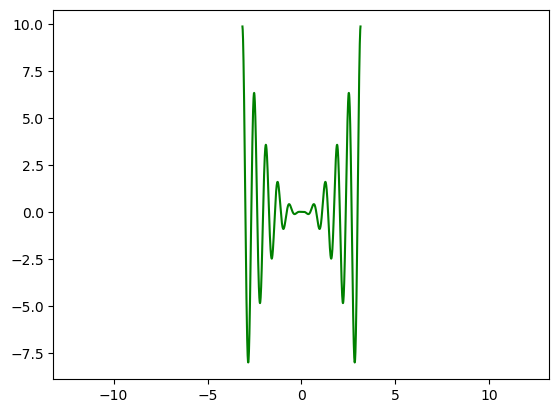

In [10]:
def f(x):
    return x ** 2 * np.cos(10 * x)


xx = np.linspace(-np.pi, np.pi, 1000)

plt.plot(xx, f(xx), color='green')
plt.axis('equal')

2. Plot, on the same graph, the functions $f_n : x\mapsto x^2 \cos(nx)$ pour $x\in
(−\pi, \pi)$ for $n = 0, 1, \dots , 10$. Observe that if we create a graph using
`plt.plot(xx,f(xx),...)`, we can call back the function `plt.plot(xx,g(xx),....)`
to draw another graph on the same figure.

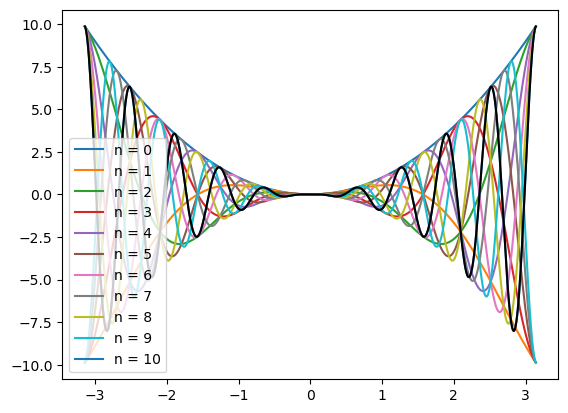

In [11]:
def g(x, n):
    return x ** 2 * np.cos(x * n)


xx = np.linspace(-np.pi, np.pi, 1000)
nn = np.arange(0, 11, 1)
for N in nn:
    plt.plot(xx, g(xx, N), label=f"n = {N}")
plt.plot(xx, f(xx), color='black')
plt.legend()
plt.show()

Finally, the `numpy.contour` function is extremely useful to plot level-sets of functions
of several variables. To do so, we consider a function $f$ of two variables and we
generate an array containing all the values of $f$ as follows: once $f$ and the two
domains of definition are give, we can write:

```{python}
z =[[f(x,y) for x in ...] for y in ..]
```

The function fonction `plt.contour(x domain,y domain,Z,N)` plots `N` level sets.
The `plt.colorbar()` command allows for a tuning of the colour scheme.


### Exercise 2.18

Plot 20 level sets of
$$f : (x, y) \mapsto e^{−x^2} \sin(\pi x − y)$$
for $(x, y) \in (−4, 4)^2$. Toy around with the options `cmap='inferno'`,
`cmap='plasma'`...


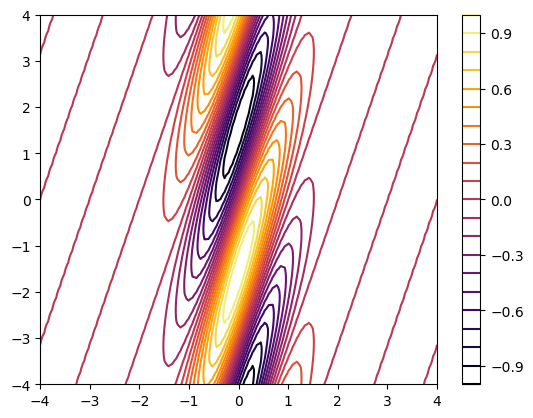

In [12]:
def f(x, y):
    return np.exp(-x ** 2) * np.sin(np.pi * x - y)


bound = np.linspace(-4, 4, 100)
Z = [[f(x, y) for x in bound] for y in bound]

plt.contour(bound, bound, Z, 20, cmap='inferno')
plt.colorbar()
plt.show()

## Basics of gradient descent

### Exercise 2.19

1. We first consider the minimisation problem
   $$\inf_{x\in\mathbb{R}^d}\frac12\left\langle Ax, x\right\rangle − \left\langle b, x\right\rangle.$$
   
   We work in dimension 2. Write a python function $f$ that takes as arguments $A$, $b$
   and $x$ and returns $\frac12\left\langle Ax, x\right\rangle − \left\langle b, x\right\rangle.$

In [13]:
def f(A, b, x):
    return 1 / 2 * np.dot(A, x).dot(x) - b.dot(x)

2. Choose any symmetric, positive definite matrix $A$ and generate a random vector $b$. Solve the equation
    $$Ax = b$$
    using the gradient descent method (you are of course allowed to use, here,
    the explicit expression for the gradient). Can you illustrate the order of
    convergence of your method?

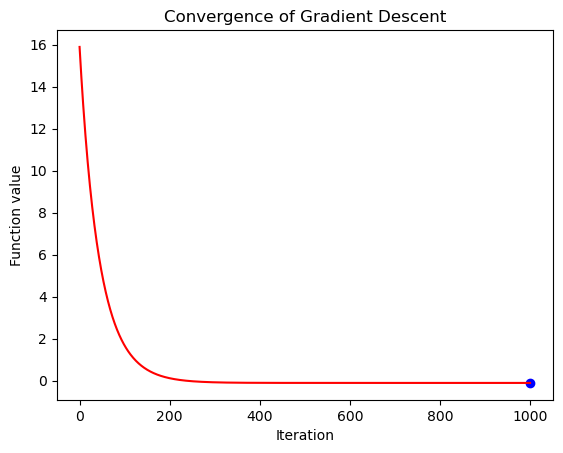

/var/folders/tp/_ld5_pzs6nx6mv1pbjhq1l740000gn/T/ipykernel_32447/1819267217.py:28: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.linalg.norm(xk - x_star, axis=1)), 'blue')


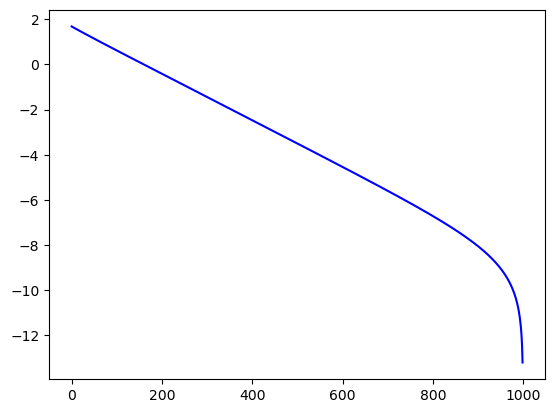

In [16]:
d = 2
M = np.random.rand(d, d)
A = M.dot(M.T) + np.eye(d)
b = np.random.rand(d)

x0 = np.random.randint(-5, 5, d).astype(float)
tau = 0.01
n_iter = 1000


def GD(x0, tau, n_iter):
    xk = []
    k_list = np.arange(n_iter)
    for _ in k_list:
        x0 -= tau * (A.dot(x0) - b)
        xk.append(x0.copy())
    return np.array(xk), k_list, xk[-1]


xk, k_list, x_star = GD(x0, tau, n_iter)
plt.plot([f(A, b, x) for x in xk], 'red')
plt.scatter(n_iter, f(A, b, np.linalg.solve(A, b)), c='blue')
plt.xlabel('Iteration')
plt.ylabel('Function value')
plt.title('Convergence of Gradient Descent')
plt.show()

plt.plot(np.log(np.linalg.norm(xk - x_star, axis=1)), 'blue')
plt.show()

3. Plot the level sets of the function $f$, and represent the successive iterates
   on the graph.

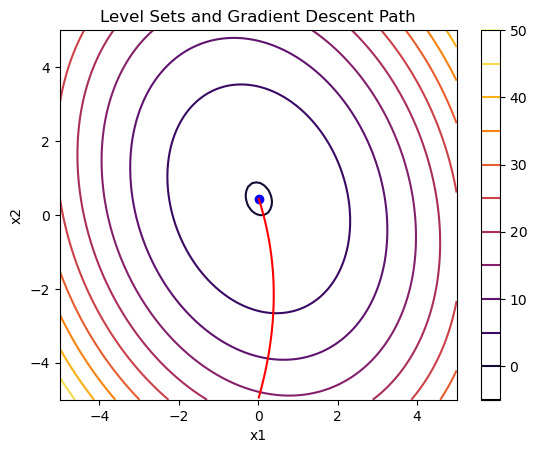

In [17]:
lim_inf, lim_sup = -5, 5
X = Y = np.linspace(lim_inf, lim_sup, 100)
xx, yy = np.meshgrid(X, Y)
Z = np.array(
    [[f(A, b, np.array([x, y])) for x in X] for y in Y])

plt.contour(xx, yy, Z, levels=10, cmap='inferno')
plt.colorbar()
plt.plot(xk[:, 0], xk[:, 1], 'red')
plt.scatter(x_star[0], x_star[1], c='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Level Sets and Gradient Descent Path')
plt.show()

## Exercice 2.20

We now consider a function $f$ of $d$ variables.

1. We aim at approximation, numerically, the gradient of a function $f$. In order to do
    so, we resort to a centred difference methods. In other words, we write:

    $$\dfrac{\partial f}{\partial e_i}\simeq \frac{f(x+\delta e_i)-f(x-\delta
    e_i)}{2\delta}$$
    for $\delta>0$ small enought where $\{e_i\}_{i=1,\dots,d}$ is the canonical
    basis of $\mathbb{R}^d$. First define the vectors $e_i$ in Python. Second,
    write a function `gradient(F,x,d,delta=1e-05)` that returns the discrete
    gradient of the Python function `F`. You can test your code on the following
    toy function:

In [240]:
import numpy as np


def F(x):
    return x[0] ** 2 + x[1] ** 2


def e(i, d):
    return np.array([1 if j == i else 0 for j in range(d)])


def gradient(F, x, d, delta=1e-05):
    return np.array([(F(x + delta * e(i, d)) - F(x - delta * e(i, d))) / (2 * delta) for i in range(d)])


print(gradient(F, np.array([1, 1]), 2))

[2. 2.]


2. Write a code that takes, as arguments, $x_0$ and a step size $\tau$ and returns the
    sequence generated by the gradient descent initialised at $x_0$ with fixed step
    size $\tau$. Test your code on `F`.

In [224]:
def gradient_algo(x0, tau, n_iter, F, d):
    x = x0
    history = [x]
    for _ in range(n_iter):
        x = x - tau * gradient(F, x, d)
        history.append(x)
    return history


print(gradient_algo(np.array([1, 1]), 0.1, 100, F, 2))

[array([1, 1]), array([0.8, 0.8]), array([0.64, 0.64]), array([0.512, 0.512]), array([0.4096, 0.4096]), array([0.32768, 0.32768]), array([0.262144, 0.262144]), array([0.2097152, 0.2097152]), array([0.16777216, 0.16777216]), array([0.13421773, 0.13421773]), array([0.10737418, 0.10737418]), array([0.08589935, 0.08589935]), array([0.06871948, 0.06871948]), array([0.05497558, 0.05497558]), array([0.04398047, 0.04398047]), array([0.03518437, 0.03518437]), array([0.0281475, 0.0281475]), array([0.022518, 0.022518]), array([0.0180144, 0.0180144]), array([0.01441152, 0.01441152]), array([0.01152922, 0.01152922]), array([0.00922337, 0.00922337]), array([0.0073787, 0.0073787]), array([0.00590296, 0.00590296]), array([0.00472237, 0.00472237]), array([0.00377789, 0.00377789]), array([0.00302231, 0.00302231]), array([0.00241785, 0.00241785]), array([0.00193428, 0.00193428]), array([0.00154743, 0.00154743]), array([0.00123794, 0.00123794]), array([0.00099035, 0.00099035]), array([0.00079228, 0.000792

We now apply this to the least square problem to test our algorithm: fix
$\alpha_0 =3$, $\alpha_1 = 2$, an integer $N$ and generate a random vector of
size $N$ by calling `Xi=numpy.random.rand(N)*2-1` (this generates numbers between $-1$
and $1$). Generate a “noise” vector `Wi=numpy.random.rand(N)*2-1`. Finally, set
`Yi=alpha0+alpha1*Xi+Wi` (the set of noisy observations we have access to). We
want to see whether we can recover the values of $\alpha_0$ and $\alpha_1$ from
the knowledge of `(Xi, Yi)`. To do so, we define, for an array $A = (a_0 ,
a_1 )$,

$$E(A)=\frac{1}{N}\sum_{k=1}^{N}|y_i-(a_0+a_1 x_i)|^2$$.

3. Write the function $A \mapsto E(A)$ in python, $A$ being coded as an `numpy`
   array. The vectors `Xi` and `Yi` are `numpy` array defined globally.

In [225]:
alpha0 = 3
alpha1 = 2
N = 100
Xi = np.random.rand(N) * 2 - 1
Wi = np.random.rand(N) * 2 - 1
Yi = alpha0 + alpha1 * Xi + Wi


def E(A):
    return np.mean(np.abs(Yi - (A[0] + A[1] * Xi)) ** 2)

4. Plot 20 level lines of $E$. Is what you observe coherent with we might expect?

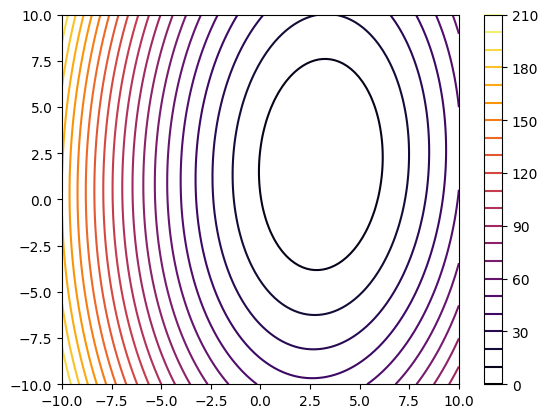

In [226]:
import matplotlib.pyplot as plt

bound = np.linspace(-10, 10, 100)
Z = [[E(np.array([x, y])) for x in bound] for y in bound]

plt.contour(bound, bound, Z, 20, cmap='inferno')
plt.scatter(x_star[0], x_star[1], c='blue')
plt.colorbar()
plt.show()

5. Minimise $E$ with a constant step-size gradient descent using the discretised
   gradient you computed earlier. Run your code with several values of $\tau$
   and find the best value for $\tau$.

In [232]:
tau_list = np.linspace(0.01, 1, 20)


def gradient_algo(x0, tau, n_iter, F, d):
    x = x0
    history = [x]
    for _ in range(n_iter):
        x = x - tau * gradient(F, x, d)
        history.append(x)
    return history


list_tau_y = []
for tau in tau_list:
    history = gradient_algo(np.array([2, 3]), tau, 100, E, 2)
    x, y = history[-1]
    list_tau_y.append((tau, y))
    print(f"tau = {tau}, x = {x}, y = {y}")

best_tau = max(list_tau_y, key=lambda x: x[1])
print(best_tau)

tau = 0.01, x = 2.9267989063524977, y = 2.479397426488201
tau = 0.06210526315789474, x = 3.0423146382848048, y = 1.916948653422947
tau = 0.11421052631578947, x = 3.0410604575195848, y = 1.8931782083689095
tau = 0.16631578947368422, x = 3.041011907165113, y = 1.8922593962938912
tau = 0.21842105263157896, x = 3.0410102257986824, y = 1.8922275765785324
tau = 0.2705263157894737, x = 3.041010174027455, y = 1.8922265968174143
tau = 0.32263157894736844, x = 3.0410101726257173, y = 1.8922265702226346
tau = 0.37473684210526315, x = 3.0410101725880336, y = 1.8922265695921598
tau = 0.4268421052631579, x = 3.0410101725894942, y = 1.8922265695855385
tau = 0.4789473684210527, x = 3.041010172589047, y = 1.8922265695800402
tau = 0.5310526315789474, x = 3.0410101725871, y = 1.8922265695806482
tau = 0.5831578947368421, x = 3.041010172590711, y = 1.8922265695834652
tau = 0.6352631578947369, x = 3.0410101725873564, y = 1.8922265695777054
tau = 0.6873684210526316, x = 3.041010172587915, y = 1.8922265695785

6. Check that we find a good approximation for $(\alpha_0,\alpha_1)$. Show datas
   `(Xi,Yi)` and the line $y=a_0+a_1x$ that you obtain, for $x\in[-1,1]$.

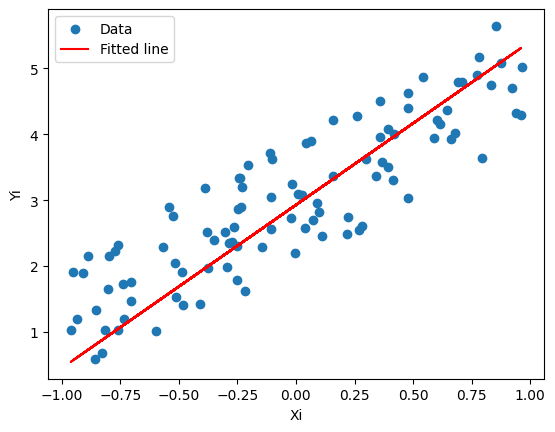

In [231]:
best_A = gradient_algo(np.array([2, 3]), best_tau[0], 100, E, 2)[-1]

plt.scatter(Xi, Yi, label='Data')
plt.plot(Xi, best_A[0] + best_A[1] * Xi, color='red', label='Fitted line')
plt.xlabel('Xi')
plt.ylabel('Yi')
plt.legend()
plt.show()